In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("C:/Users/Kiran/Downloads/tested.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
#to check for missing values in the data
total=df.isnull().sum().sort_values(ascending=False)
percent_1=df.isnull().sum()/df.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,percent_2],axis=1,keys=['Total','%'])
print(missing_data)

             Total     %
Cabin          327  78.2
Age             86  20.6
Fare             1   0.2
PassengerId      0   0.0
Survived         0   0.0
Pclass           0   0.0
Name             0   0.0
Sex              0   0.0
SibSp            0   0.0
Parch            0   0.0
Ticket           0   0.0
Embarked         0   0.0


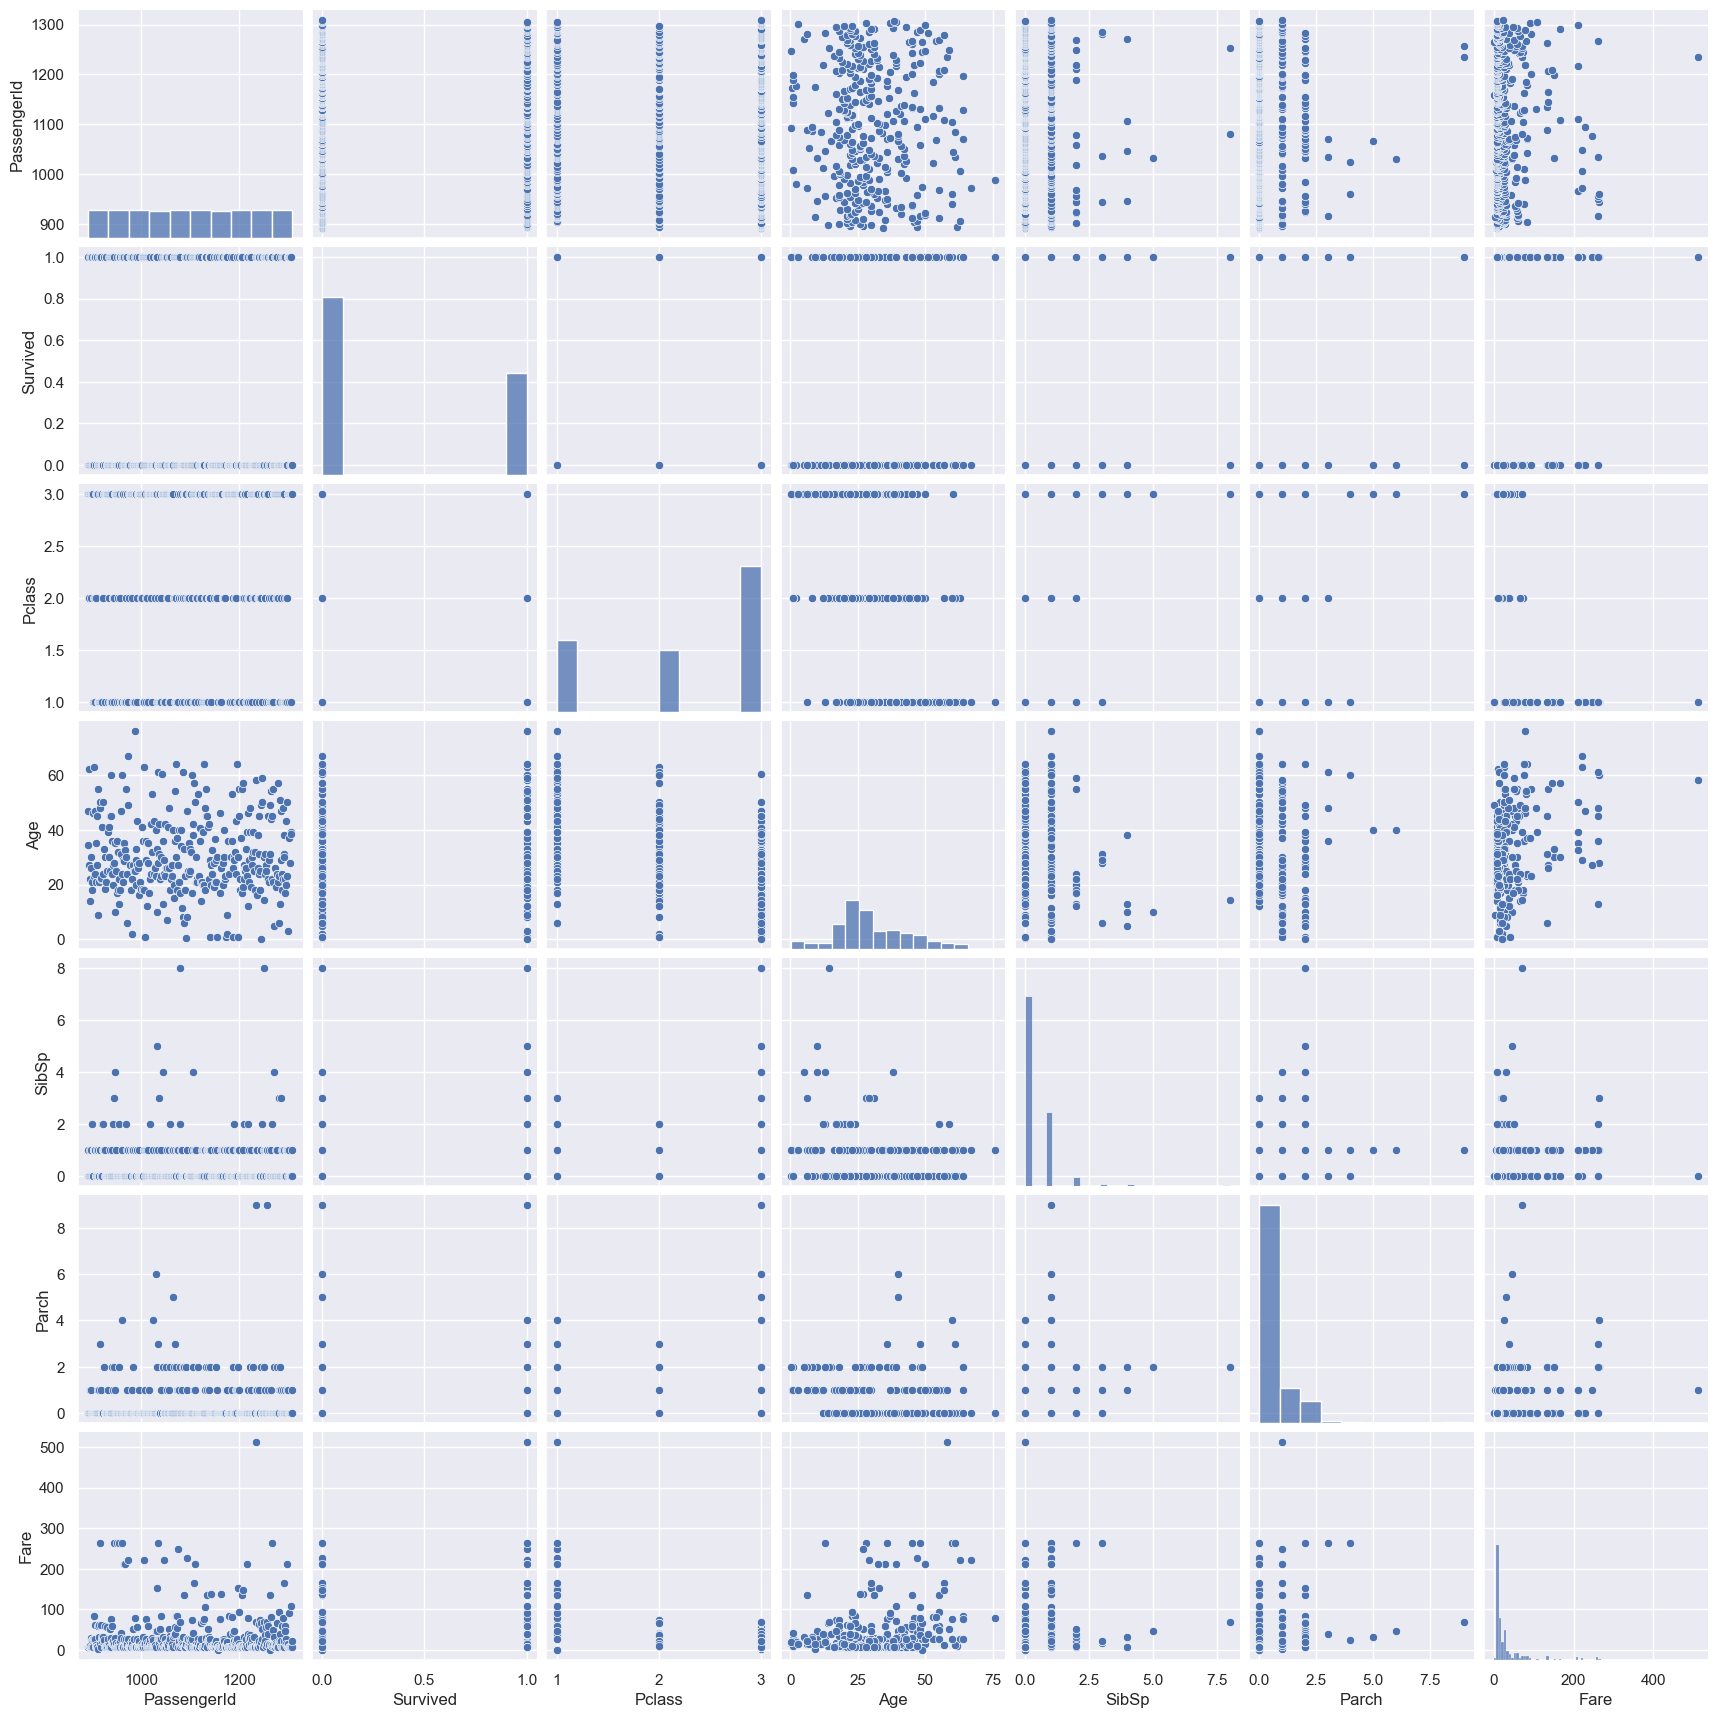

In [117]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'Female')

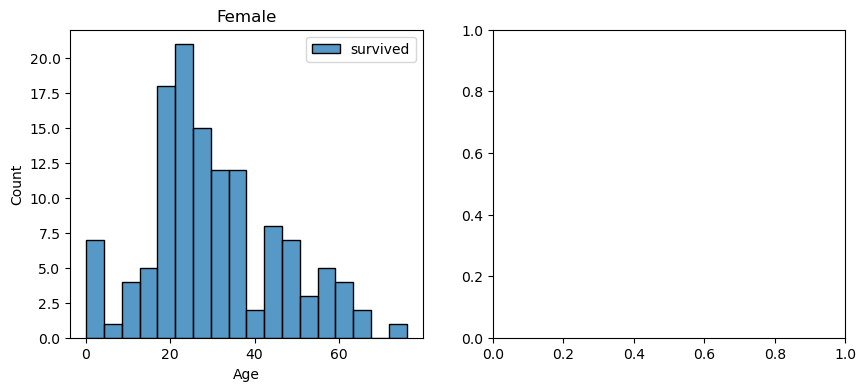

In [7]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women=df[df['Sex']=='female']
men=df[df['Sex']=='male']
ax=sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

Text(0.5, 1.0, 'Male')

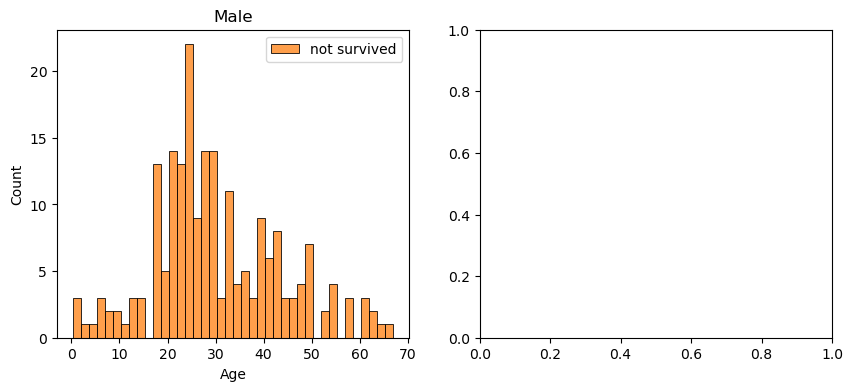

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax=sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Male')

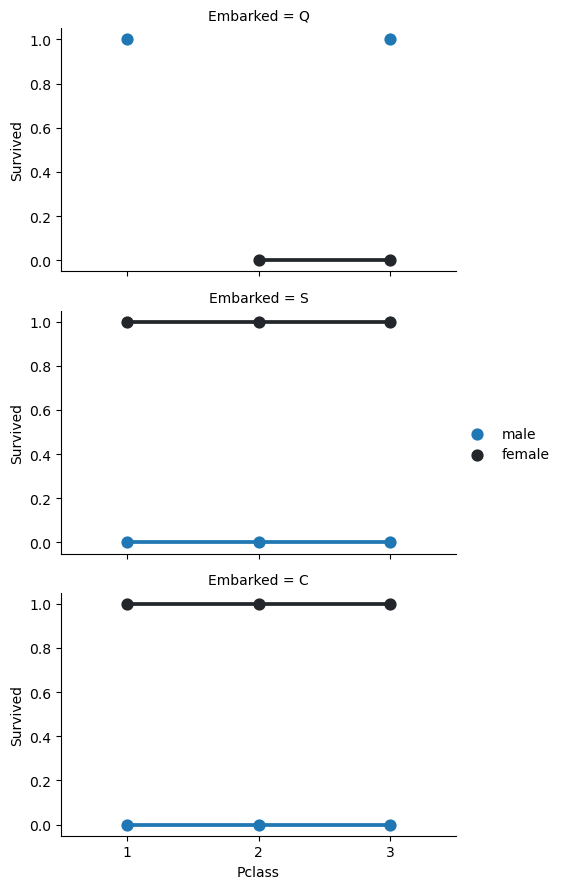

In [9]:
FacetGrid=sns.FacetGrid(df,row='Embarked',aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

1    253
0    165
Name: not_alone, dtype: int64

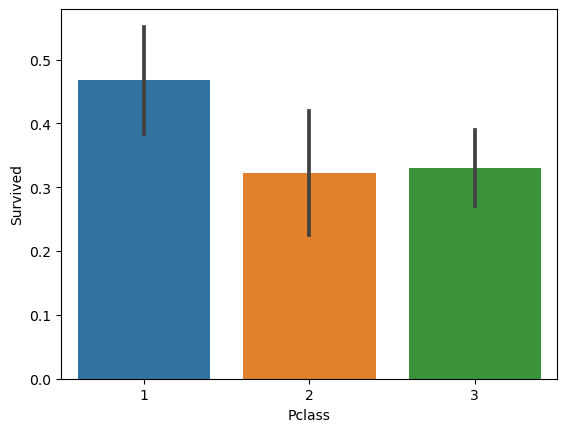

In [10]:
sns.barplot(x='Pclass',y='Survived',data=df)
df['relatives']=df['SibSp']+df['Parch']
df.loc[df['relatives']>0,'not_alone']=0
df.loc[df['relatives']==0,'not_alone']=1
df['not_alone']=df['not_alone'].astype(int)
df['not_alone'].value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,1
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,1
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,1


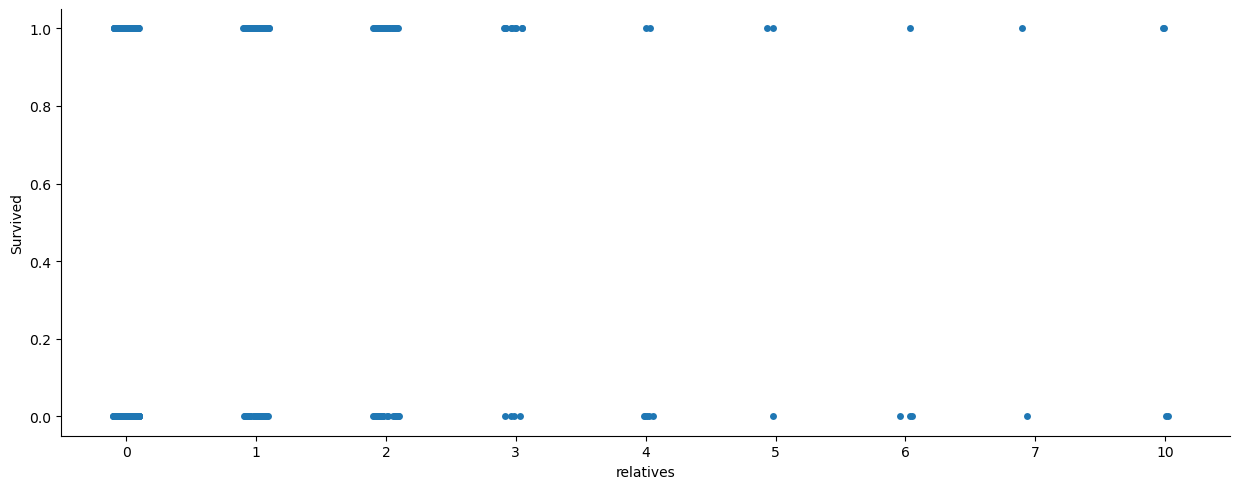

In [11]:
axes = sns.catplot(x='relatives', y='Survived', data=df, aspect=2.5)
df=df.drop(['PassengerId'],axis=1)
df

In [12]:
#REPLACEMENT OF MISSING VALUES IN 'CABIN' COLUMN
import re
Deck={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'U':8}
df['Cabin']=df['Cabin'].fillna("U0")
df['Deck']=df['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
df['Deck']=df['Deck'].map(Deck)
df['Deck']=df['Deck'].fillna(0)
df['Deck']=df['Deck'].astype(int)
df=df.drop(['Cabin'],axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,0,8


In [13]:
#REPLACEMENT OF MISSING VALUES IN 'AGE' COLUMN
mean=df['Age'].mean()
std=df["Age"].std()
is_null=df["Age"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=df['Age'].copy()
age_slice[np.isnan(age_slice)]=rand_age
df['Age']=age_slice
df['Age']=df['Age'].astype(int)
df["Age"].isnull().sum()
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0,1,8
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1,0,8
2,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0,1,8
3,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0,1,8
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2,0,8


In [14]:
#REPLACEMENT OF MISSING VALUES IN 'FARE' COLUMN
mean=df['Fare'].mean()
std=df["Fare"].std()
is_null=df["Fare"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=df['Fare'].copy()
age_slice[np.isnan(age_slice)]=rand_age
df['Fare']=age_slice
df['Fare']=df['Fare'].astype(int)
df["Fare"].isnull().sum()

0

In [15]:
#to check if there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   418 non-null    int64 
 1   Pclass     418 non-null    int64 
 2   Name       418 non-null    object
 3   Sex        418 non-null    object
 4   Age        418 non-null    int32 
 5   SibSp      418 non-null    int64 
 6   Parch      418 non-null    int64 
 7   Ticket     418 non-null    object
 8   Fare       418 non-null    int32 
 9   Embarked   418 non-null    object
 10  relatives  418 non-null    int64 
 11  not_alone  418 non-null    int32 
 12  Deck       418 non-null    int32 
dtypes: int32(4), int64(5), object(4)
memory usage: 36.1+ KB


In [16]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
titles={"Mr":1,'Miss':2,"Mrs":3,"Master":4,"Rare":5}
df['Title']=df.Name.str.extract('([A-Za-z]+)\.',expand=False)
df['Title']=df['Title'].replace(['Lady','Countess','Capt','Sir','Don','Col','Dr','Major','Rev','Dona'],'Rare')
df['Title']=df['Title'].replace("Mlle",'Miss')
df['Title']=df['Title'].replace('Ms','Miss')
df['Title']=df['Title'].replace('Mme','Mrs')
df['Title']=df['Title'].map(titles)
df['Title']=df['Title'].fillna(0)
df=df.drop(['Name'],axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,34,0,0,330911,7,Q,0,1,8,1
1,1,3,female,47,1,0,363272,7,S,1,0,8,3
2,0,2,male,62,0,0,240276,9,Q,0,1,8,1
3,0,3,male,27,0,0,315154,8,S,0,1,8,1
4,1,3,female,22,1,1,3101298,12,S,2,0,8,3


In [17]:
#DROPPING/REPLACING THE UNNECESSARY COLUMNS
genders={'male':0,'female':1}
df['Sex']=df['Sex'].map(genders)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,34,0,0,330911,7,Q,0,1,8,1
1,1,3,1,47,1,0,363272,7,S,1,0,8,3
2,0,2,0,62,0,0,240276,9,Q,0,1,8,1
3,0,3,0,27,0,0,315154,8,S,0,1,8,1
4,1,3,1,22,1,1,3101298,12,S,2,0,8,3


In [18]:
df["Ticket"].describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [19]:
df=df.drop(['Ticket'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   418 non-null    int64 
 1   Pclass     418 non-null    int64 
 2   Sex        418 non-null    int64 
 3   Age        418 non-null    int32 
 4   SibSp      418 non-null    int64 
 5   Parch      418 non-null    int64 
 6   Fare       418 non-null    int32 
 7   Embarked   418 non-null    object
 8   relatives  418 non-null    int64 
 9   not_alone  418 non-null    int32 
 10  Deck       418 non-null    int32 
 11  Title      418 non-null    int64 
dtypes: int32(4), int64(7), object(1)
memory usage: 32.8+ KB


In [20]:
ports={'S':0,'C':1,'Q':2}
df['Embarked']=df['Embarked'].map(ports)

df.loc[df['Age']<=11,'Age']=0
df.loc[(df['Age']>11)&(df['Age']<=18),'Age']=1
df.loc[(df['Age']>18)&(df['Age']<=22),'Age']=2
df.loc[(df['Age']>22)&(df['Age']<=27),'Age']=3
df.loc[(df['Age']>27)&(df['Age']<=33),'Age']=4
df.loc[(df['Age']>33)&(df['Age']<=40),'Age']=5
df.loc[(df['Age']>40)&(df['Age']<=66),'Age']=6
df.loc[df['Age']>66,'Age']=6
df['Age'].value_counts()

6    84
3    79
4    66
5    63
2    57
1    46
0    23
Name: Age, dtype: int64

In [21]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
Survived,1.000000,-0.108615,1.000000,-0.011365,0.099943,0.159120,0.191442,0.126779,0.161803,-0.244187,-0.129712,0.565539
Pclass,-0.108615,1.000000,-0.108615,-0.385608,0.001087,0.018721,-0.577756,0.031096,0.012736,0.173555,0.708747,-0.119826
Sex,1.000000,-0.108615,1.000000,-0.011365,0.099943,0.159120,0.191442,0.126779,0.161803,-0.244187,-0.129712,0.565539
Age,-0.011365,-0.385608,-0.011365,1.000000,-0.147569,-0.083579,0.244400,0.088039,-0.141113,0.051380,-0.324334,-0.094459
SibSp,0.099943,0.001087,0.099943,-0.147569,1.000000,0.306895,0.172071,-0.100603,0.788610,-0.618483,-0.080321,0.269295
Parch,0.159120,0.018721,0.159120,-0.083579,0.306895,1.000000,0.230455,-0.125164,0.827242,-0.495618,-0.038262,0.302061
Fare,0.191442,-0.577756,0.191442,0.244400,0.172071,0.230455,1.000000,0.052518,0.250470,-0.283510,-0.600048,0.218116
Embarked,0.126779,0.031096,0.126779,0.088039,-0.100603,-0.125164,0.052518,1.000000,-0.140254,0.104214,-0.084293,0.031726
relatives,0.161803,0.012736,0.161803,-0.141113,0.788610,0.827242,0.250470,-0.140254,1.000000,-0.685316,-0.072136,0.354127
not_alone,-0.244187,0.173555,-0.244187,0.051380,-0.618483,-0.495618,-0.283510,0.104214,-0.685316,1.000000,0.213031,-0.436558


In [22]:
df.loc[df['Fare']<=7.91,'Fare']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare']=2
df.loc[(df['Fare']>31)&(df['Fare']<=99),'Fare']=3
df.loc[(df['Fare']>99)&(df['Fare']<=250),'Fare']=4
df.loc[df['Fare']>250,'Fare']=5
df['Fare'].value_counts()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,5,0,0,0,2,0,1,8,1
1,1,3,1,6,1,0,0,0,1,0,8,3
2,0,2,0,6,0,0,1,2,0,1,8,1
3,0,3,0,3,0,0,1,0,0,1,8,1
4,1,3,1,2,1,1,1,0,2,0,8,3


In [23]:
df['Fare_Per_Person']=df['Fare']/(df['relatives']+1)
df['Fare_Per_Person']=df['Fare_Per_Person'].astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_Per_Person
0,0,3,0,5,0,0,0,2,0,1,8,1,0
1,1,3,1,6,1,0,0,0,1,0,8,3,0
2,0,2,0,6,0,0,1,2,0,1,8,1,1
3,0,3,0,3,0,0,1,0,0,1,8,1,1
4,1,3,1,2,1,1,1,0,2,0,8,3,0


In [24]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Fare_Per_Person
Survived,1.000000,-0.108615,1.000000,-0.011365,0.099943,0.159120,0.227961,0.126779,0.161803,-0.244187,-0.129712,0.565539,0.047573
Pclass,-0.108615,1.000000,-0.108615,-0.385608,0.001087,0.018721,-0.738454,0.031096,0.012736,0.173555,0.708747,-0.119826,-0.651925
Sex,1.000000,-0.108615,1.000000,-0.011365,0.099943,0.159120,0.227961,0.126779,0.161803,-0.244187,-0.129712,0.565539,0.047573
Age,-0.011365,-0.385608,-0.011365,1.000000,-0.147569,-0.083579,0.223486,0.088039,-0.141113,0.051380,-0.324334,-0.094459,0.302493
SibSp,0.099943,0.001087,0.099943,-0.147569,1.000000,0.306895,0.317243,-0.100603,0.788610,-0.618483,-0.080321,0.269295,-0.220069
Parch,0.159120,0.018721,0.159120,-0.083579,0.306895,1.000000,0.335194,-0.125164,0.827242,-0.495618,-0.038262,0.302061,-0.218482
Fare,0.227961,-0.738454,0.227961,0.223486,0.317243,0.335194,1.000000,-0.116284,0.403839,-0.490469,-0.592852,0.305320,0.622420
Embarked,0.126779,0.031096,0.126779,0.088039,-0.100603,-0.125164,-0.116284,1.000000,-0.140254,0.104214,-0.084293,0.031726,-0.078829
relatives,0.161803,0.012736,0.161803,-0.141113,0.788610,0.827242,0.403839,-0.140254,1.000000,-0.685316,-0.072136,0.354127,-0.271069
not_alone,-0.244187,0.173555,-0.244187,0.051380,-0.618483,-0.495618,-0.490469,0.104214,-0.685316,1.000000,0.213031,-0.436558,0.242929


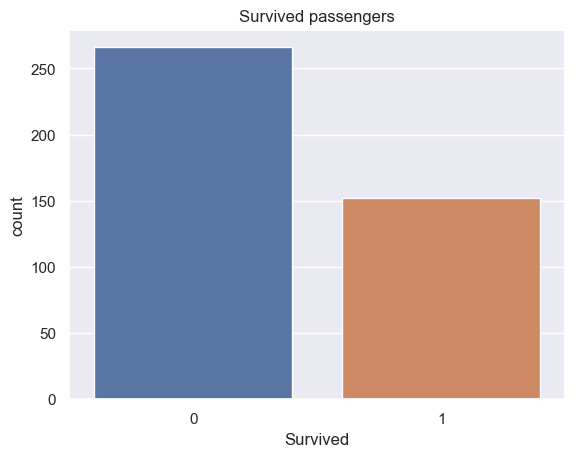

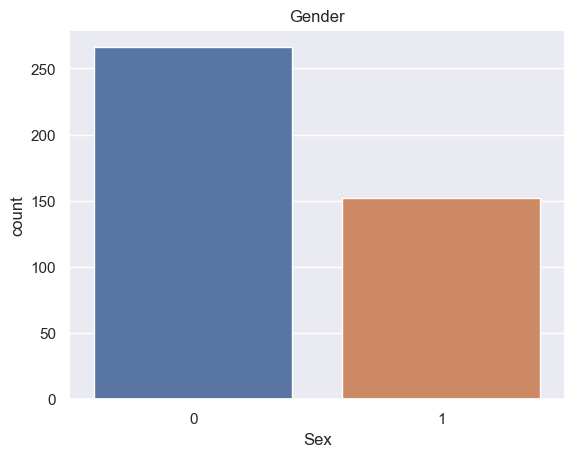

Text(0.5, 1.0, 'Number of Passengers in different class.')

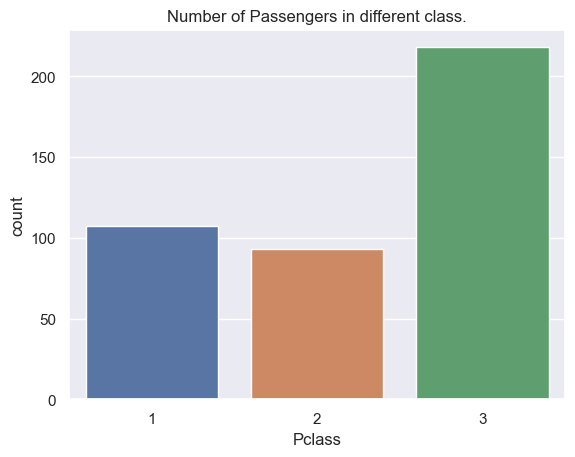

In [25]:
# Visualizing of the Data
sns.set()
sns.countplot(x = 'Survived', data = df).set_title('Survived passengers')
plt.show()
sns.countplot(x = 'Sex', data = df).set_title('Gender')
plt.show()
sns.countplot(x = 'Pclass', data = df).set_title('Number of Passengers in different class.')

# Modelling

In [26]:
# MODELLING
# Load in sci-kit learn functions for constructing logistic regressionimport pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

x = df.drop('Survived', axis=1)
y = df['Survived']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
# Calculate accuracy on the train set
y_pred_train = LR.predict(X_train)
print('Logistic Regression :')
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Logistic Regression :
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [27]:
# Calculate accuracy on the test set
y_pred_LR = LR.predict(X_test)   
acc_log = round(accuracy_score(y_test, y_pred_LR), 2) * 100
print("\nAccuracy of Test Data is = ", acc_log, "%")
classification_report_result = classification_report(y_test, y_pred_LR)
confusion_mat = confusion_matrix(y_test, y_pred_LR)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_mat)

# Calculate the percentage of survival in TEST DATA FOR LOGISTIC REGRESSION
percentage=round(y_pred_LR.mean()*100,2)
print(f"\nThe percentage of survival of people in the Test Data is: {percentage}%\n")

# Calculate the percentage of survival in TRAIN DATA FOR LOGISTIC REGRESSION
element_count = np.count_nonzero(y_pred_train == 1)
total_elements = y_pred_train.size
percentage = round((element_count / total_elements) * 100,2)
print(f"The percentage of survival of people in the Train Data is: {percentage}%\n\n\n")


Accuracy of Test Data is =  100.0 %
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]

The percentage of survival of people in the Test Data is: 40.48%

The percentage of survival of people in the Train Data is: 35.33%





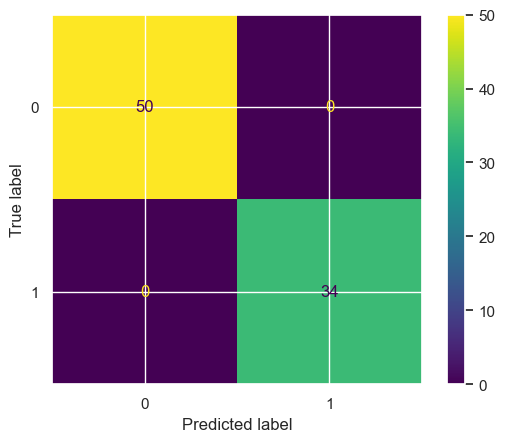

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

In [29]:
# DecisionTreeClassifier
decision_tree=DecisionTreeClassifier() 
decision_tree.fit(X_train,y_train)
y_pred_DT=decision_tree.predict(X_test) 
acc_decision_tree = accuracy_score(y_test, y_pred_DT)*100
      
# RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100) 
random_forest.fit(X_train,y_train)
y_pred_RF=random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,y_train)*100,2)
acc_random_forest = accuracy_score(y_test, y_pred_RF)*100
      
# LinearSVC
linear_svc=LinearSVC() 
linear_svc.fit(X_train,y_train)
y_pred_SVC=linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(y_test, y_pred_SVC)*100

In [30]:
# Accuracy of each one
results=pd.DataFrame({'Model':['Support Vector Machines', 'Logistic Regression', 'Random Forest','Decision Tree'],'Accuracy(%)':[acc_linear_svc, acc_log, acc_random_forest, acc_decision_tree]})
result_df=results.sort_values(by='Accuracy(%)', ascending=False)
result_df =result_df.set_index('Accuracy(%)')
print(result_df.head())

                               Model
Accuracy(%)                         
100.0        Support Vector Machines
100.0            Logistic Regression
100.0                  Random Forest
100.0                  Decision Tree
